<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [59]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

!pip install nbconvert[webpdf]

  Created wheel for websockets: filename=websockets-8.1-cp39-cp39-win_amd64.whl size=62758 sha256=e426e6c00d7f9b8ce7a867a82a6604c7403cd80934f43ce8f198b3c50704e35c
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\d8\b9\a0\b97b211aeda2ebd6ac2e43fc300d308dbf1f9df520ed390cae
Successfully built websockets


Load the dataset into a dataframe.


In [6]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


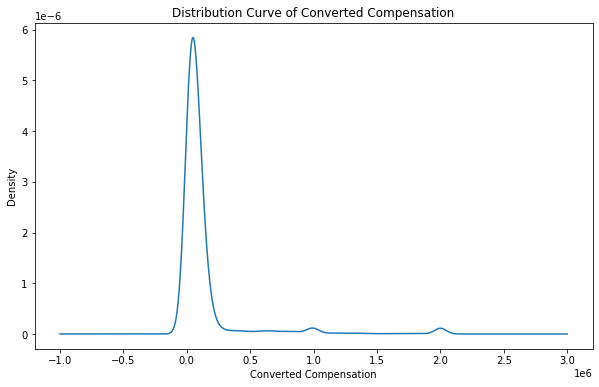

In [9]:
# your code goes here
df['ConvertedComp'].plot(kind = 'kde', figsize = (10,6))

# Adding labels and title
plt.xlabel('Converted Compensation')
plt.ylabel('Density')
plt.title('Distribution Curve of Converted Compensation')

# Show the plot
plt.show()

Plot the histogram for the column `ConvertedComp`.


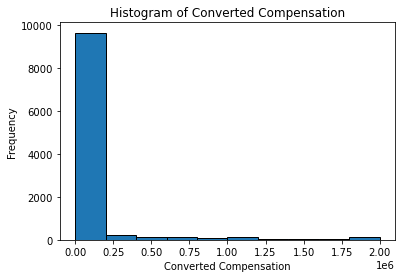

In [12]:
# your code goes here
df['ConvertedComp'].plot(kind = 'hist', bins = 10, edgecolor = 'black')

# Add labels and title
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Compensation')

plt.show()


What is the median of the column `ConvertedComp`?


In [13]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [17]:
# your code goes here
df[df['Gender']=='Man'].shape[0]

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [18]:
# your code goes here
df[df['Gender']=='Woman']['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [24]:
# your code goes here
q1 = df['Age'].quantile(0.25)
q2 = df['Age'].quantile(0.50)
q3 = df['Age'].quantile(0.75)
minimum = df['Age'].min()
maximum = df['Age'].max()

print("Minimum:", minimum)
print("Q1:", q1)
print("Median (Q2):", q2)
print("Q3:", q3)
print("Maximum:", maximum)

Minimum: 16.0
Q1: 25.0
Median (Q2): 29.0
Q3: 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


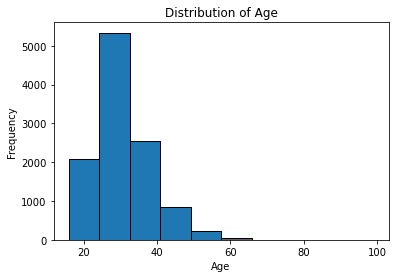

In [25]:
# your code goes here
df['Age'].plot(kind = 'hist', bins = 10, edgecolor = 'black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


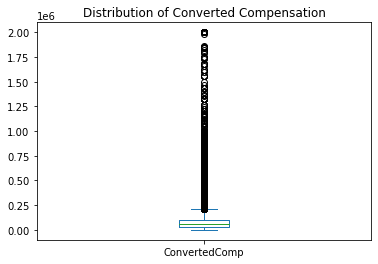

In [26]:
# your code goes here
df['ConvertedComp'].plot(kind = 'box')

plt.title('Distribution of Converted Compensation')

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [27]:
# your code goes here
iqr_convertedcomp = q3 - q1
print(iqr_convertedcomp)

10.0


Find out the upper and lower bounds.


In [28]:
# your code goes here
lower_bound = q1 - (1.5 * iqr_convertedcomp)
upper_bound = q3 + (1.5 * iqr_convertedcomp)

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

Lower bound: 10.0
Upper bound: 50.0


Identify how many outliers are there in the `ConvertedComp` column.


In [30]:
# your code goes here
# your code goes here
outliers = df[(df['ConvertedComp'] < lower_bound) & (df['ConvertedComp'] > upper_bound)]
num_outliers = len(outliers) 

print("Number of Outliers:", num_outliers)

Number of Outliers: 0


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [33]:
# your code goes here
filtered_df = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

print("\nFiltered DataFrame (without outliers):")
print(filtered_df)


Filtered DataFrame (without outliers):
      Respondent                                         MainBranch Hobbyist  \
3506        7742  I am not primarily a developer, but I write co...      Yes   
4913       10773                     I am a developer by profession      Yes   
9970       21823                     I am a developer by profession      Yes   

                                            OpenSourcer  \
3506                                              Never   
4913  Less than once a month but more than once per ...   
9970                                              Never   

                                             OpenSource          Employment  \
3506  OSS is, on average, of HIGHER quality than pro...  Employed full-time   
4913  OSS is, on average, of LOWER quality than prop...  Employed full-time   
9970  The quality of OSS and closed source software ...  Employed full-time   

            Country         Student                                   EdLevel  \
3506

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [57]:
# your code goes here
df.corr()



,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
